Import all necessary modules into the project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in the Wine dataset as a dataframe and view the data.

In [2]:
df = pd.read_csv('wine.csv')
df.head(2)

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


Plot the distributions of these features by "Cultivar":
- Alcalinity of ash
- Flavanoids
- Hue
- Proline

<AxesSubplot:xlabel='Proline', ylabel='Density'>

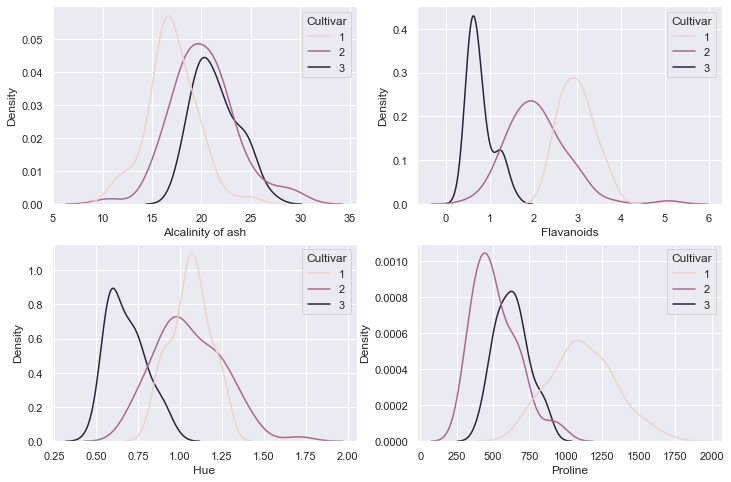

In [3]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

sns.kdeplot(data=df, x='Alcalinity of ash', hue='Cultivar', ax=ax[0,0])
sns.kdeplot(data=df, x='Flavanoids', hue='Cultivar', ax=ax[0,1])
sns.kdeplot(data=df, x='Hue', hue='Cultivar', ax=ax[1,0])
sns.kdeplot(data=df, x='Proline', hue="Cultivar", ax=ax[1,1])

Convert the dataframe into a numpy array; include all columns except "Cultivar".

Print out the numpy array.

In [4]:
x = df.drop(['Cultivar'], axis=1).values
x.shape

(178, 13)

Performance standardization on the numpy array.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Plot these features again, by "Cultivar", after scaling:
- Alcalinity of ash
- Flavanoids
- Hue
- Proline

In [8]:
df.drop('Cultivar', axis=1).head(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [16]:
index_for_cultivar1 = df[df['Cultivar'] == 1]
index_for_cultivar2 = df[df['Cultivar'] == 2]
index_for_cultivar3 = df[df['Cultivar'] == 3]
list_of_index = [3, 6, 10, 12]`

In [26]:
max(index_for_cultivar1.index)

58

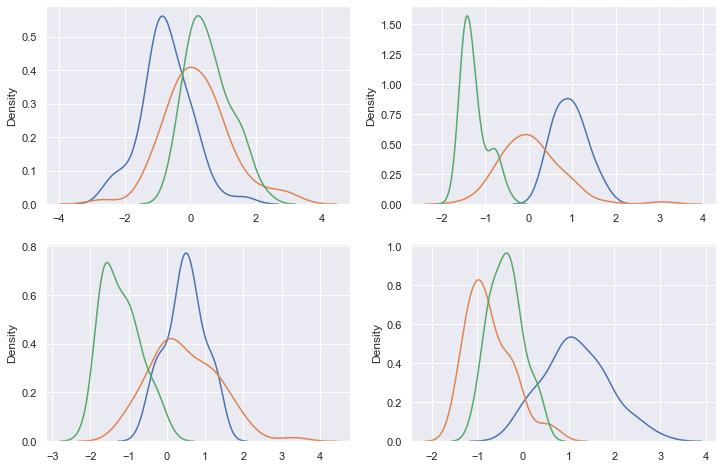

In [27]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
k=0
for i in range(2):
    for j in range(2):
        sns.kdeplot(data=x_scaled[min(index_for_cultivar1.index):max(index_for_cultivar1.index), list_of_index[k]], ax=ax[i,j])
        sns.kdeplot(data=x_scaled[min(index_for_cultivar2.index):max(index_for_cultivar2.index), list_of_index[k]], ax=ax[i,j])
        sns.kdeplot(data=x_scaled[min(index_for_cultivar3.index):max(index_for_cultivar3.index), list_of_index[k]], ax=ax[i,j])
        k += 1

Perform PCA with 4 principal components on the scaled numpy array.

In [28]:
num_of_components = 4
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [29]:
pca.fit_transform(x_scaled)
pca

PCA(n_components=4)

Print the ratios of explained variance captured by each of the 4 principal components.

In [30]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

Print the percentage of original information captured with 4 principal components.

In [31]:
pca.explained_variance_ratio_.sum()

0.7359899907589926

Print all the explained variance ratios for all possible number of principal components after 4.

Print the minimum number of principal components needed to capture at least 85% of the original information of our dataset.

In [35]:
min_component = -1

for i in range(4,10):
    pca = PCA(n_components=i)
    pca.fit_transform(x_scaled)
    sum_ratio = pca.explained_variance_ratio_.sum()
    if sum_ratio >= 0.85:
        min_component = i
        break
        
print(min_component)

6
